In [1]:
import pandas as pd
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('../water_consensus/all_solvent_consensus_status_withconsensus.csv')
df = df[df.binding_site==df.binding_site]

df22_wat = df[(df.solvent=="HOH") & (df.model=="2.2Å") & (df['consensus of wat in 2.3Å'])]
df23_wat = df[(df.solvent=="HOH") & (df.model=="2.3Å") & (df['consensus of wat in 2.2Å'])]
dfX_wat = df[(df.solvent=="HOH") & (df.model.isin(['1gid_A','1gid_B','1gid_C','1gid_D','1hr2_A','1hr2_B']))]

residues = list(range(22,409))

waters22_ = np.hstack(df22_wat.binding_site.apply(lambda x: np.array([int(res.split('-')[1].split(':')[0]) for res in x.split() if x==x])).to_list())
waters22 = [np.count_nonzero(waters22_==i) for i in residues]
waters23_ = np.hstack(df23_wat.binding_site.apply(lambda x: np.array([int(res.split('-')[1].split(':')[0]) for res in x.split() if x==x])).to_list())
waters23 = [np.count_nonzero(waters23_==i) for i in residues]
watersX_ = np.hstack(dfX_wat.binding_site.apply(lambda x: np.array([int(res.split('-')[1].split(':')[0]) for res in x.split() if x==x])).to_list())
watersX = [np.count_nonzero(watersX_==i) for i in residues]

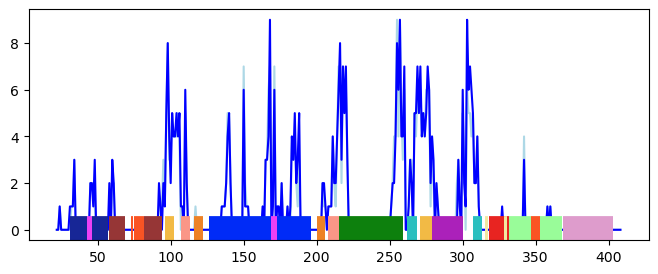

In [3]:
fig, ax1 = plt.subplots(figsize=(8,3))
#sns.lineplot(x=residues,y=watersX,ax=ax1,color='red')#,markers=[','])
sns.lineplot(x=residues,y=waters23,ax=ax1,color='lightblue')
sns.lineplot(x=residues,y=waters22,ax=ax1,color='blue')#,color=QcolorB ,,linewidth=linewidth)
width = 20 
#P2.1 -- changed
ax1.hlines(0,58,69,color=(0.59,0.21,0.21),linewidth=width)
ax1.hlines(0,82,94,color=(0.59,0.21,0.21),linewidth=width)
#P2
ax1.hlines(0,31,43,color=(0.09,0.15,0.59),linewidth=width)
ax1.hlines(0,46,57,color=(0.09,0.15,0.59),linewidth=width)
#P3
ax1.hlines(0,271,279,color=(0.95,0.73,0.27),linewidth=width)
ax1.hlines(0,96,102,color=(0.95,0.73,0.27),linewidth=width)
#P4 -- changed
ax1.hlines(0,107,113,color=(0.98,0.59,0.53),linewidth=width)
ax1.hlines(0,208,215,color=(0.98,0.59,0.53),linewidth=width)
#P5
ax1.hlines(0,116,122,color=(0.93,0.51,0.15),linewidth=width)
ax1.hlines(0,200,206,color=(0.93,0.51,0.15),linewidth=width)
#P5abc -- changed
ax1.hlines(0,126,169,color=(0.00,0.17,0.97),linewidth=width)
ax1.hlines(0,173,196,color=(0.00,0.17,0.97),linewidth=width)
#P6 -- changed
ax1.hlines(0,215,259,color=(0.05,0.50,0.05),linewidth=width)
#P7 -- changed
ax1.hlines(0,262,269,color=(0.17,0.75,0.75),linewidth=width)
ax1.hlines(0,307,313,color=(0.17,0.75,0.75),linewidth=width)
#P8
ax1.hlines(0,279,300,color=(0.67,0.13,0.73),linewidth=width)
#P9
ax1.hlines(0,318,332,color=(0.91,0.14,0.13),linewidth=width)
#P9.1 -- changed
ax1.hlines(0,353,368,color=(0.60,0.99,0.60),linewidth=width)
ax1.hlines(0,332,347,color=(0.60,0.99,0.60),linewidth=width)
#P9.2 -- changed
ax1.hlines(0,369,403,color=(0.87,0.61,0.80),linewidth=width)
#P9a -- changed
ax1.hlines(0,315,317,color=(0.95,0.91,0.63),linewidth=width)
ax1.hlines(0,328,330,color=(0.95,0.91,0.63),linewidth=width)
#P13 -- changed
ax1.hlines(0,347,353,color=(0.98,0.33,0.14),linewidth=width)
ax1.hlines(0,75,82,color=(0.98,0.33,0.14),linewidth=width)
ax1.hlines(0,73,74,color=(0.98,0.33,0.14),linewidth=width)
#P14 -- changed
ax1.hlines(0,43,46,color=(0.93,0.25,0.96),linewidth=width)
ax1.hlines(0,169,173,color=(0.93,0.25,0.96),linewidth=width)

In [4]:
Qdf = pd.read_csv('../per_residue_comparison/per_residue_summary.csv')
goodres = Qdf[(Qdf['Qscore 2.2A']>0.6)&(Qdf['Qscore 2.3A']>0.6)].residue_number.to_list()

In [5]:
allresolved = [np.count_nonzero(waters22_==i) for i in goodres]
print(len(allresolved),sum(allresolved),sum(allresolved)/len(allresolved))

280 408 1.457142857142857


In [6]:
count_dict = {}

# catalytic core
core = [261,304,305,306,307,308,206, 207, 208,262] 
count_dict['Catalytic core'] = ([np.count_nonzero(waters22_==i) for i in core],core)

# P5b-P6 Tetraloop-receptor, tetraloop
TTR = [150,152,153,248,250,223,224] # 249 not resolved151
count_dict['TTR'] = ([np.count_nonzero(waters22_==i) for i in TTR],TTR)

# P5 other 133, 134,135 188 144 145, 148, 193
P5abc = [125, 126, 127, 128, 129, 132, 133, 134,  188, 193,144, 145, 146, 147, 148, 151,135,136,137,138,139,140,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,141, 142, 143, 149, 154, 155, 156, 157, 158, 159, 160, 161, 162,189, 190, 191, 192, 194, 195, 196,] # 179 not resolved
count_dict['P5abc other'] = ([np.count_nonzero(waters22_==i) for i in P5abc],P5abc)

# P3
P3 = [103, 104, 105, 106,272,273,274,275,276,277,278,96,97,98,99,100,101,102] 
count_dict['P3 other'] = ([np.count_nonzero(waters22_==i) for i in P3],P3)

# P7 
P7 = [309,310,311,312,313,314,264,265,266,267,268,269, 270,271,263] #
count_dict['P7 other'] = ([np.count_nonzero(waters22_==i) for i in P7],P7)

# P6 226, 227, 247
P6 = [215,216,217,218,219,220,221,222,251,252,253,254,255,256,257,258,225,226, 227, 228, 245, 246, 247]
count_dict['P6 other'] = ([np.count_nonzero(waters22_==i) for i in P6],P6)

P2 = [31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58,59, 60, 61, 91, 92, 93, 94, 95,27, 37, 49,62, 76, 90 ] # 37
count_dict['P2/.1 other'] = ([np.count_nonzero(waters22_==i) for i in P2],P2)
P45 = [107, 108, 109, 110, 111, 112, 113,201, 202, 203, 204, 205, 209, 210, 211, 212, 213, 214, 259, 260,114, 115, 116, 117, 119, 120, 121, 123, 124,200]
count_dict['P4,5 other'] = ([np.count_nonzero(waters22_==i) for i in P45],P45)
P8 = [279, 280, 281, 282, 283, 296, 297, 298, 299, 300, 301, 302, 303,284, 285, 286, 294, 295,] # 
count_dict['P8 other'] = ([np.count_nonzero(waters22_==i) for i in P8],P8)
P9 = [315, 316, 318, 320, 321, 322, 323, 324, 325, 327, 328, 329, 330, 331,403, 405, 406, 404, 317, 319, 326] #
count_dict['P9 other'] = ([np.count_nonzero(waters22_==i) for i in P9],P9)
P91 = [337, 338, 342, 343, 344, 345, 346, 358, 359,347, 348, 360, 361, 362, 363,402,401,353, 354, 355, 356, 357, 364, 365, 366,332, 334, 335, 336, 339, 340, 341] # 
count_dict['P9.1/2 other'] = ([np.count_nonzero(waters22_==i) for i in P91],P91)
print([x for x in goodres if x not in TTR+core+P5abc+P3+P7+P6+P91+P9+P8+P45+P2])

count_dict['all resolved'] = ([np.count_nonzero(waters22_==i) for i in goodres],goodres)

[]


In [7]:
print([x for x in TTR+core+P5abc+P3+P7+P6+P91+P9+P8+P45+P2 if x not in goodres])


[]


(0.6, 1.0)

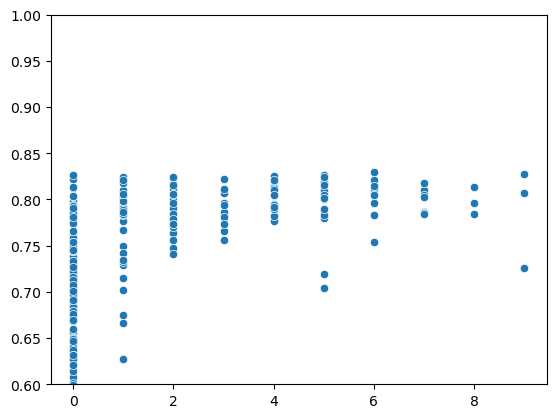

In [8]:
sns.scatterplot(x=waters22,y=Qdf['Qscore 2.2A'].to_list())
plt.ylim(0.6,1)

In [9]:
print(sorted(core))

[206, 207, 208, 261, 262, 304, 305, 306, 307, 308]


In [11]:
data = []
for name,(L,LL) in count_dict.items():
    data.append([name,len(L),sum(L),np.mean(L),np.std(L,ddof=1)/np.sqrt(np.size(L)),Qdf[Qdf.residue_number.isin(LL)]['Qscore 2.2A'].mean()])
    
pd.DataFrame(data,columns=['region','#nt','#cryoEM wat','wat/nt','sem','meanQ']).sort_values('wat/nt',ascending=False)

,region,#nt,#cryoEM wat,wat/nt,sem,meanQ
3,P3 other,18,80,4.444444,0.397888,0.805962
5,P6 other,23,75,3.260870,0.657031,0.774398
0,Catalytic core,10,28,2.800000,0.904311,0.751049
4,P7 other,15,42,2.800000,0.656107,0.786097
8,P8 other,18,32,1.777778,0.586089,0.761713
11,all resolved,280,408,1.457143,0.131919,0.753450
7,"P4,5 other",30,39,1.300000,0.349548,0.738032
1,TTR,7,8,1.142857,0.828900,0.773932
2,P5abc other,66,72,1.090909,0.228226,0.755203
6,P2/.1 other,40,26,0.650000,0.158316,0.758041


In [10]:
print(len(TTR),sum(TTR_count22),sum(TTR_count22)/len(TTR),TTR_count22)
print(len(core),sum(core_count22),sum(core_count22)/len(core),core_count22)
print(len(P5),sum(P5_count22),sum(P5_count22)/len(P5),P5_count22)
print(len(P3),sum(P3_count22),sum(P3_count22)/len(P3),P3_count22)
print(len(P7),sum(P7_count22),sum(P7_count22)/len(P7),P7_count22)
print(len(P6),sum(P6_count22),sum(P6_count22)/len(P6),P6_count22)

NameError: name 'TTR_count22' is not defined

In [71]:
df22wat = pd.DataFrame(np.array([residues,waters22]).T,columns=['residue_number','num_waters'])

In [57]:
import MDAnalysis
u22 = MDAnalysis.Universe(PDB22_F)

bfactors = np.zeros(len(u22.atoms))
for i,row in df22wat.iterrows():
    i,val = change_value_bfactor(row,u22,'num_waters','num_waters')
    bfactors[i] = val
u22.atoms.tempfactors = bfactors
u22.atoms.write('test_.pdb')

C:\Users\racha\anaconda3\lib\site-packages\MDAnalysis\coordinates\PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
